# 1. **Importing libraries and dataset**

I am using pandas for working with data sets, sklearn to create models and matplotlib to plot graph.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline 

### **Import Dataset**

In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 2. **Data Analysis**

### Let's see the count of total survived and dead

In [4]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0, 0.5, 'Count')

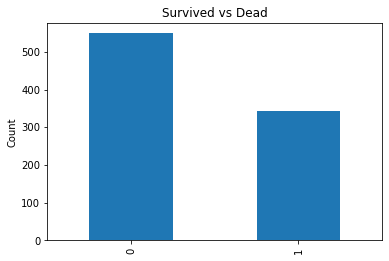

In [5]:
train['Survived'].value_counts().plot(kind='bar', title='Survived vs Dead')
plt.ylabel('Count')

### This displays the gender count and survival rate based on gender. We can deduce that a higher number of women survived compared to men.

In [6]:
survival_by_sex = train.groupby('Sex')['Survived'].value_counts().unstack()
survival_by_sex

Survived,0,1
Sex,,
female,81,233
male,468,109


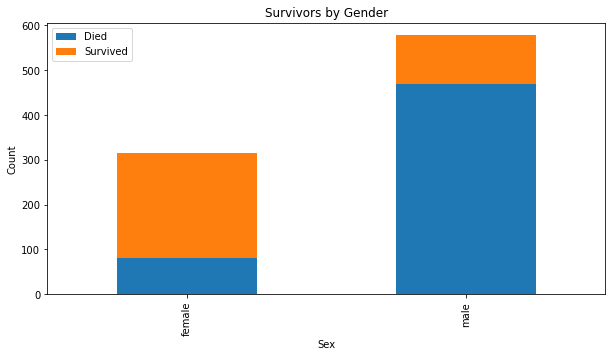

In [7]:
plt.rc('figure', figsize=(10, 5))
survival_by_sex.plot(kind='bar', stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

### This displays the class count and survival rate based on class.

In [8]:
pclass_ct = train.groupby('Pclass')['Survived'].value_counts().unstack()
pclass_ct

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


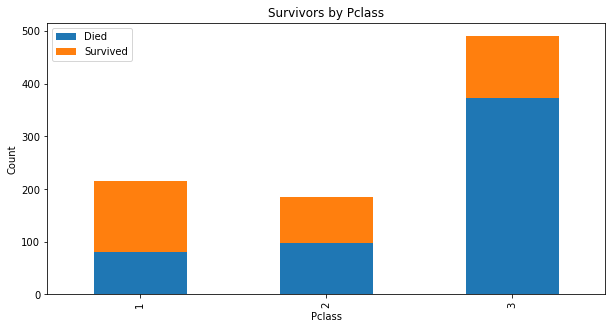

In [9]:
plt.rc('figure')
pclass_ct.plot(kind='bar', stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

### The following show's the histogram of Age.

<AxesSubplot:>

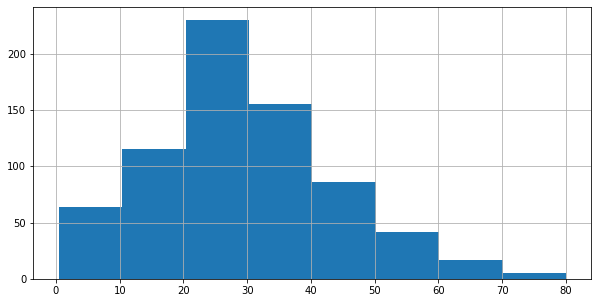

In [10]:
train['Age'].hist(bins=8)

# 3. **Feature Engineering**

### **Handling Missing Values**

### First let's look at what's the situation of the dataset. We can see, Age has 177 missing values, Cabin has 687 missing values and Embarked has 2 missing values

In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
print(f"Max age is {train['Age'].max()}\n Min age is {train['Age'].min()}")

Max age is 80.0
 Min age is 0.42


In [16]:
train['Age'].isnull().sum()

177

In [17]:
train['Age'].fillna(int(train['Age'].mean()), inplace=True)
test['Age'].fillna(int(test['Age'].mean()),inplace=True)

train['Embarked'].fillna('S',inplace=True)

In [18]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### **Check for missing value in test file**

A fare is missing. Replace it with mean of fares.

In [19]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [20]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.216507,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.635016,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [21]:
test['Fare'].fillna(test['Fare'].median(),inplace=True)

In [22]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Because machine learning algorithms assume (and require) your data to be numeric, categorical data must be pre-processed in order for it to be accepted. Transforming the nominal columns to numerical values. For example, replacing the 'males' with 0 and 'females' with 1 (Label Encoding). Also, creating one hot encoding for 'Embarked'.

In [24]:
train['Sex'] = train['Sex'].replace('male', 0)
train['Sex'] = train['Sex'].replace('female', 1)

test['Sex'] = test['Sex'].replace('male', 0)
test['Sex'] = test['Sex'].replace('female', 1)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [26]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
train_updated=pd.get_dummies(train, columns = ['Embarked'],drop_first=True)
train_updated

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.0,1,2,W./C. 6607,23.4500,NaN,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,0,0


In [28]:
test_updated=pd.get_dummies(test, columns = ['Embarked'],drop_first=True)
test_updated

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,30.0,0,0,A.5. 3236,8.0500,NaN,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,1
416,1308,3,"Ware, Mr. Frederick",0,30.0,0,0,359309,8.0500,NaN,0,1


### **Dropping Columns**

We need to eliminate some columns as they are not essential.

The Ticket column contains unique values, which are not necessary for training our models.
The Name column can be safely dropped as it does not impact the overall dataset.
The PassengerId column consists of unique values and can be removed.
Given the large amount of missing data in the Cabin column, it is more efficient to remove it rather than attempt to predict the values.

In [29]:
train_updated.drop(['Name', 'Cabin', 'Ticket', 'PassengerId'], inplace=True, axis=1)
test_updated.drop(['Name', 'Cabin', 'Ticket', 'PassengerId'], inplace=True, axis=1)

In [30]:
train_updated

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,1
887,1,1,1,19.0,0,0,30.0000,0,1
888,0,3,1,29.0,1,2,23.4500,0,1
889,1,1,0,26.0,0,0,30.0000,0,0


In [31]:
train_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(2)
memory usage: 50.6 KB


In [32]:
test_updated

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,1,0
1,3,1,47.0,1,0,7.0000,0,1
2,2,0,62.0,0,0,9.6875,1,0
3,3,0,27.0,0,0,8.6625,0,1
4,3,1,22.0,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...
413,3,0,30.0,0,0,8.0500,0,1
414,1,1,39.0,0,0,108.9000,0,0
415,3,0,38.5,0,0,7.2500,0,1
416,3,0,30.0,0,0,8.0500,0,1


In [33]:
test_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        418 non-null    float64
 6   Embarked_Q  418 non-null    uint8  
 7   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(2)
memory usage: 20.5 KB


### **Adding Some New Features**
We can add some features which can be useful
1. Family Size = SibSp + Parch + 1
2. Alone or not = Having family size == 1 means Alone.

In [34]:
train_updated['Family_size'] = train_updated['SibSp'] + train_updated['Parch'] + 1
test_updated['Family_size'] = test_updated['SibSp'] + test_updated['Parch'] + 1

In [35]:
train_updated['Alone'] = 1
train_updated['Alone'].loc[train_updated['Family_size'] > 1] = 0

test_updated['Alone'] = 1
test_updated['Alone'].loc[test_updated['Family_size'] > 1] = 0

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [36]:
train_updated

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Family_size,Alone
0,0,3,0,22.0,1,0,7.2500,0,1,2,0
1,1,1,1,38.0,1,0,71.2833,0,0,2,0
2,1,3,1,26.0,0,0,7.9250,0,1,1,1
3,1,1,1,35.0,1,0,53.1000,0,1,2,0
4,0,3,0,35.0,0,0,8.0500,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,1,1,1
887,1,1,1,19.0,0,0,30.0000,0,1,1,1
888,0,3,1,29.0,1,2,23.4500,0,1,4,0
889,1,1,0,26.0,0,0,30.0000,0,0,1,1


### **Normalize the columns**

In [37]:
#MinMaxScaler
scaler = MinMaxScaler()
cols_to_norm = ['Age','Fare']
train_updated[cols_to_norm] = scaler.fit_transform(train_updated[cols_to_norm])
train_updated

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Family_size,Alone
0,0,3,0,0.271174,1,0,0.014151,0,1,2,0
1,1,1,1,0.472229,1,0,0.139136,0,0,2,0
2,1,3,1,0.321438,0,0,0.015469,0,1,1,1
3,1,1,1,0.434531,1,0,0.103644,0,1,2,0
4,0,3,0,0.434531,0,0,0.015713,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0.334004,0,0,0.025374,0,1,1,1
887,1,1,1,0.233476,0,0,0.058556,0,1,1,1
888,0,3,1,0.359135,1,2,0.045771,0,1,4,0
889,1,1,0,0.321438,0,0,0.058556,0,0,1,1


In [38]:
scaler = MinMaxScaler()
cols_to_norm = ['Age','Fare']
test_updated[cols_to_norm] = scaler.fit_transform(test_updated[cols_to_norm])
test_updated

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Family_size,Alone
0,3,0,0.452723,0,0,0.015282,1,0,1,1
1,3,1,0.617566,1,0,0.013663,0,1,2,0
2,2,0,0.815377,0,0,0.018909,1,0,1,1
3,3,0,0.353818,0,0,0.016908,0,1,1,1
4,3,1,0.287881,1,1,0.023984,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...
413,3,0,0.393380,0,0,0.015713,0,1,1,1
414,1,1,0.512066,0,0,0.212559,0,0,1,1
415,3,0,0.505473,0,0,0.014151,0,1,1,1
416,3,0,0.393380,0,0,0.015713,0,1,1,1


# **4. Train the Model**

In [39]:
#splitting the data
X = train_updated.drop('Survived', axis = 1)
y = train_updated['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [40]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(712, 10)
(179, 10)
(712,)
(179,)


In [41]:
#logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_valid)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [42]:
accuracy_score(y_pred, y_valid)

0.8044692737430168

In [43]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_valid)
y_pred_svc

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [44]:
accuracy_score(y_pred_svc, y_valid)

0.8044692737430168

In [45]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dt = clf.predict(X_valid)

In [46]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_valid, y_pred_dt))

Accuracy: 0.8044692737430168


In [47]:
#RandomForestClassifier  
rf_classifier= RandomForestClassifier(n_estimators= 14, criterion="entropy")  
rf_classifier.fit(X_train, y_train) 
y_pred_rf = rf_classifier.predict(X_valid)

In [48]:
print("Accuracy:",accuracy_score(y_valid, y_pred_rf))

Accuracy: 0.8491620111731844


In [49]:
test_pred=rf_classifier.predict(test_updated)
test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

## Creating the output file

In [50]:
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
output = pd.DataFrame()
output['PassengerId'] = test_df['PassengerId']
output['Survived'] = test_pred
output.to_csv('/kaggle/working/submission.csv', index=False)
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
